In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

# Define the path to your zip file in Google Drive
zip_path = "/content/drive/MyDrive/MNIST.zip"

# Define the target extraction path
extract_path = "/content/mnist_data"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import struct  # For handling binary data # Used to decode binary data.
import numpy as np  # NumPy for array operations #Used to store and work with image/label data as arrays.
from array import array  # Array module for handling byte data

class MnistDataLoader:
    """
    A class to load the MNIST dataset from binary files.
    """
    #This is the constructor.It stores the file paths of the training and test image and label files.

    def __init__(self, train_image, train_label, test_image, test_label):
        self.train_image = train_image
        self.train_label = train_label
        self.test_image = test_image
        self.test_label = test_label

#This function reads one pair of files: an image file and a label file. It returns them as arrays.
    def read_images_labels(self, img_path, label_path):
        """Reads images and labels from the given file paths."""

        # Read labels
        with open(label_path, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError(f'Magic number mismatch, expected 2049, got {magic}')
            labels = np.array(array("B", file.read()))



#Reads how many images there are and what size they are, Loads all the pixel data
#Shapes it into a clean format: one 28x28 image per row
#Returns the images and labels together
        # Read images
        with open(img_path, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError(f'Magic number mismatch, expected 2051, got {magic}')
            image_data = np.array(array("B", file.read())).reshape(size, rows, cols)#number_of_images, 28, 28

        return image_data, labels

    def load_data(self):
        """Loads training and test data."""
        x_train, y_train = self.read_images_labels(self.train_image, self.train_label)
        x_test, y_test = self.read_images_labels(self.test_image, self.test_label)
        return (x_train, y_train), (x_test, y_test)


In [ ]:
# Define the file paths for the extracted MNIST dataset
train_image = os.path.join(extract_path, 'train-images.idx3-ubyte')
train_label = os.path.join(extract_path, 'train-labels.idx1-ubyte')

test_image = os.path.join(extract_path, 't10k-images.idx3-ubyte')
test_label = os.path.join(extract_path, 't10k-labels.idx1-ubyte')

# Create a data loader instance
mnist_dataloader = MnistDataLoader(train_image, train_label, test_image, test_label)

# Load data
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

print("MNIST data loaded successfully!")


MNIST data loaded successfully!


In [ ]:
## Normalize the pixel values to be between 0 and 1 for better neural network performance
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to have the format (batch_size, height, width, channels) for CNN input
# The images are 28x28 pixels with 1 color channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
import tensorflow as tf # Importing TensorFlow library for building and training deep learning models
from tensorflow import keras# Import Keras API for easier model building and training
from tensorflow.keras import layers

# Define the CNN model
# Define a Convolutional Neural Network (CNN) model for classifying MNIST digits (0-9)
# The model consists of:
# - Convolutional layers to extract features from images (32 and 64 filters)
# - Max pooling layers to reduce the size of the images while retaining important features
# - A Flatten layer to convert the 2D image data into a 1D vector
# - Dense layers (fully connected) to make predictions based on the extracted features
# - The final output layer has 10 units (one for each digit 0-9) with a softmax activation function
#   to produce probability distributions for classification

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# - optimizer='adam': Adam optimizer is used for efficient training by adjusting the learning rate during training.
# - loss='sparse_categorical_crossentropy': This loss function is used for multi-class classification problems with integer-labeled classes (like digits 0-9 in MNIST).
# - Track accuracy as the performance metric.

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc}')


# ✅ Save the trained model to your Google Drive
model.save('/content/drive/MyDrive/mnist_cnn_model.h5')
print("✅ Model saved to Google Drive!")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8952 - loss: 0.3348 - val_accuracy: 0.9845 - val_loss: 0.0508
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9890 - val_loss: 0.0338
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9904 - val_loss: 0.0292
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9919 - val_loss: 0.0290
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0124 - val_accuracy: 0.9936 - val_loss: 0.0263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9971 - loss: 0.0094


Test Accuracy: 0.9904000163078308
✅ Model saved to Google Drive!


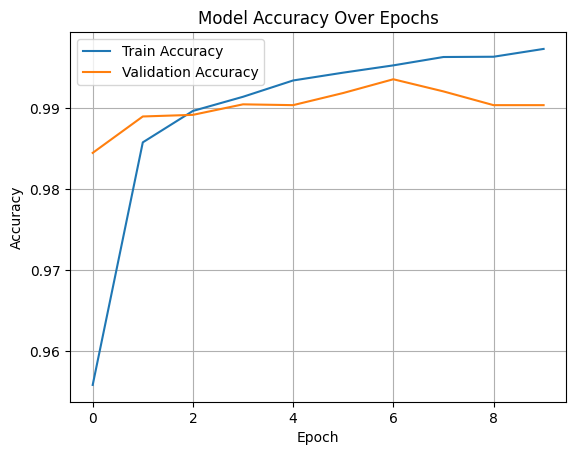

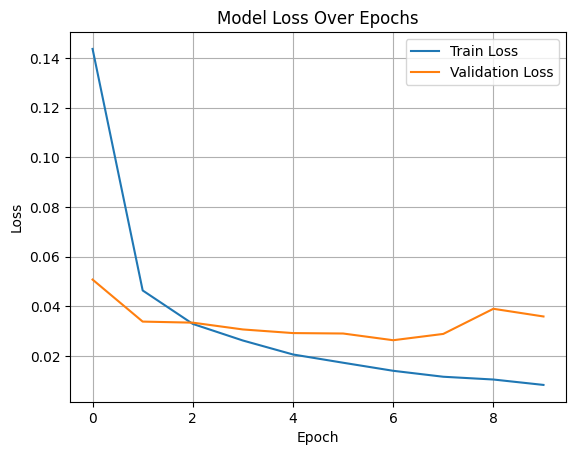

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to display a grid of images with their corresponding labels
def show(images, labels, num_images=10):
    cols = 5  # Number of columns in the grid
    rows = (num_images // cols) + 1  # Calculate number of rows
    plt.figure(figsize=(12, 12))

    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)  # Create a subplot for each image
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
        plt.title(f'Label: {labels[i]}')  # Display the label as title
        plt.axis('off')  # Hide axis for better visualization

    plt.show()  # Display all images


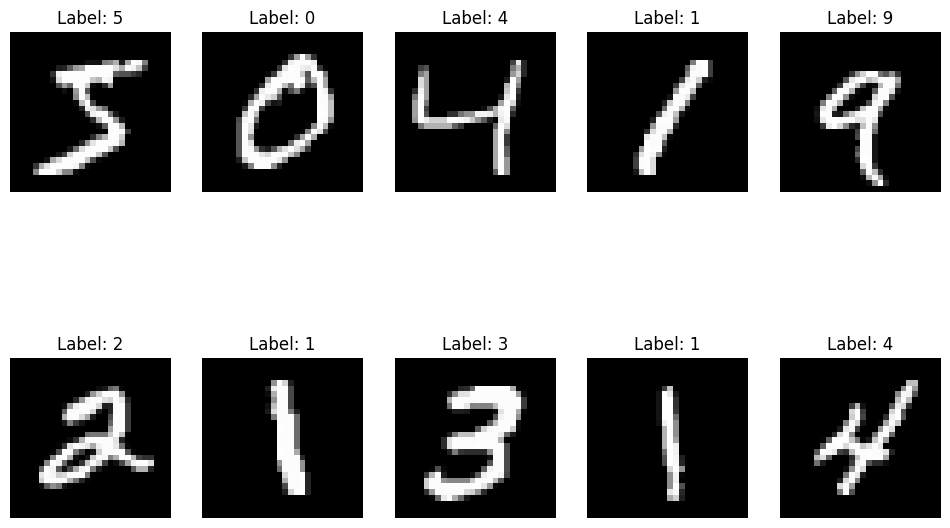

In [ ]:
show(x_train[:10], y_train[:10], num_images=10)


✅ Model loaded successfully!


Label(value='📌 Upload an image or enter a file path:')

Label(value='')

Button(description='Predict', style=ButtonStyle(button_color='green'))

Upload Done ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


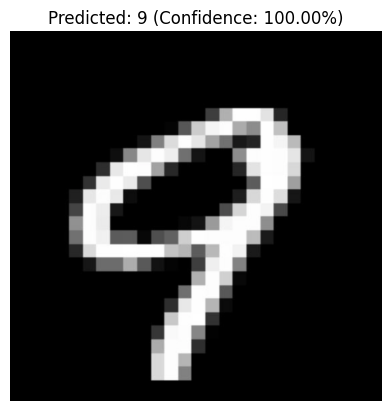

✅ Predicted Digit: 9 with 100.00% confidence.
Upload Done ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


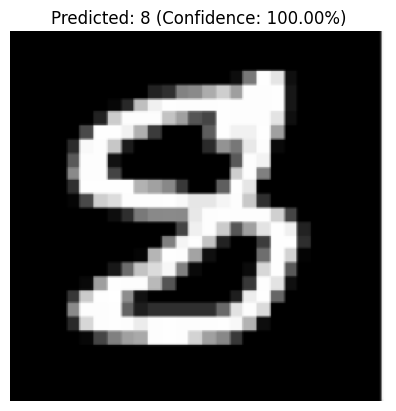

✅ Predicted Digit: 8 with 100.00% confidence.
Upload Done ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


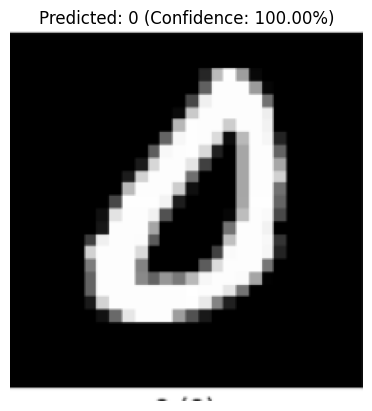

✅ Predicted Digit: 0 with 100.00% confidence.
Upload Done ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


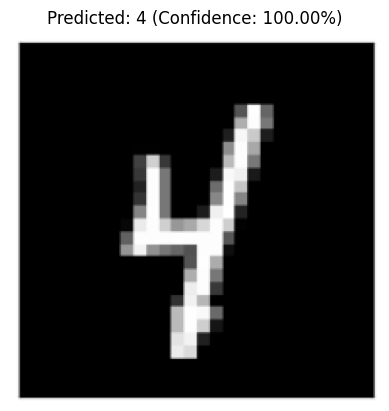

✅ Predicted Digit: 4 with 100.00% confidence.


In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the saved model
model = load_model('/content/drive/MyDrive/mnist_cnn_model.h5')
print("✅ Model loaded successfully!")

# --- The rest stays the same ---
def handle_upload(change):
    if not upload_button.value:
        return
    input_path = next(iter(upload_button.value))
    with open("/tmp/user_image.png", "wb") as f:
        f.write(upload_button.value[input_path]['content'])
    path_label.value = "/tmp/user_image.png"
    print("Upload Done ✅")

def handle_path_input(change):
    path_label.value = path_input.value.strip()
    print(f'Path Entered ✅: {path_label.value}')

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    _, img_array = cv2.threshold(img_array, 128, 255, cv2.THRESH_BINARY_INV)
    img_array = cv2.bitwise_not(img_array)
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

def handle_prediction(change):
    input_path = path_label.value
    if not input_path:
        print("❌ No valid image path provided.")
        return
    img_array = preprocess_image(input_path)
    prediction = model.predict(img_array)
    prediction_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    img = Image.open(input_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {prediction_label} (Confidence: {confidence:.2f}%)')
    plt.axis('off')
    plt.show()

    print(f'✅ Predicted Digit: {prediction_label} with {confidence:.2f}% confidence.')

# Widgets
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
path_input = widgets.Text(description="Image Path:")
submit_button = widgets.Button(description="Predict", style={'button_color': 'green'})
path_label = widgets.Label(value="")

def predict_input():
    upload_button.observe(handle_upload, names='value')
    path_input.observe(handle_path_input, names='value')
    submit_button.on_click(handle_prediction)

    display(widgets.Label("📌 Upload an image or enter a file path:"))
    display(widgets.VBox([upload_button, path_input]))
    display(path_label)
    display(submit_button)

predict_input()


In [ ]:
!pip install scikit-learn


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


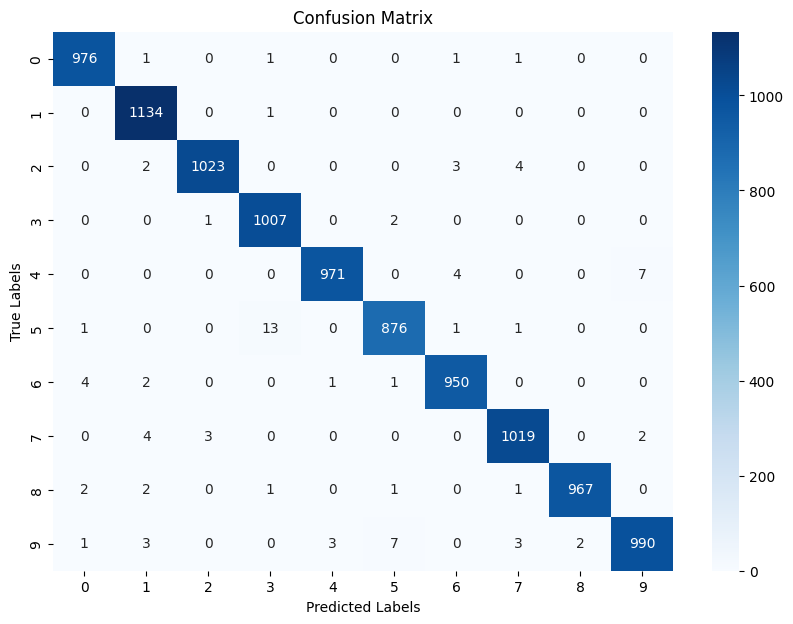

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test dataset labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred_classes))


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Colab Notebooks"


'Copy of Snippets: Importing libraries'      'HTR Recognition.ipynb'
'Copy of Snippets: Importing libraries (1)'   MNIST.ipynb
'crnn Handwritting Recognition.ipynb'	      Untitled1.ipynb
'Handwritten Text OCR try 1.ipynb'
